# Visualizing National Parks in South of Korea

##### by May 15,       2019

In this project, I will explore dataset of the national parks in this country and I will visualize the distribution map of parks. So I can get the information about numbers of parks and these locations.

## Work Flow

1. Getting Started 


2. Data wrangling Phase

   2-1.  Cleaning dataset

   
    

3. Visualizing Dataset

    3-1. Plotting Distribution of Parks
    
    3-2. Plotting Park's Distribution by types
   
    3-3. Plotting park's Distribution in Gyeonggi-do 
    
    3-4. Sample data in Seoul


## 1. Getting Started

The first step in data analysis is that exploring dataset. This process is a fundamental practice to analyze data and involves summarizing the main characteristics of the dataset including data size, missing values and initial patterns. I conducted the investigation about national park's dataset by Python's tool such as pandas and ggplot library.

In [1]:
# Import libraries necessary for this project
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

# To visualize the map
import folium

# Pretty display for notebooks
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# To handling default matplotlib value
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.unicode_minus'] = False

# To import koran language to charts
from matplotlib import rc

#  Using Apple's  korea font
rc('font', family='AppleGothic')

In [2]:
# Data loading

park = pd.read_csv('national_parks.csv', encoding='cp949')

## 데이터 살펴보기

## 2. Data wrangling Phase

### 2-1. Cleaning dataset

In [3]:
# Data loading

park.shape

(16730, 20)

National parks dataset has 16730 data points with 20 variables each.

In [4]:
park.head()

관리번호       공원명  공원구분            소재지도로명주소              소재지지번주소  \
0  29170-00001    문화근린공원  근린공원     광주광역시 북구 대천로 86  광주광역시 북구 문흥동 1009-1   
1  29170-00002  두암제1근린공원  근린공원     광주광역시 북구 삼정로 36   광주광역시 북구 두암동 969-4   
2  29170-00003  첨단체육근린공원  근린공원  광주광역시 북구 임방울대로 877    광주광역시 북구 오룡동 1113   
3  29170-00004  일곡제1근린공원  근린공원     광주광역시 북구 일곡로 55   광주광역시 북구 일곡동 850-1   
4  29170-00005  일곡제2근린공원  근린공원    광주광역시 북구 설죽로 526   광주광역시 북구 일곡동 820-2   

          위도          경도      공원면적 공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설)  \
0  35.184917  126.916686   87710.3          NaN          NaN          NaN   
1  35.165104  126.937650   13383.5          NaN          NaN          NaN   
2  35.220546  126.858765  170920.6          NaN          NaN          NaN   
3  35.207975  126.895445   34840.3          NaN          NaN          NaN   
4  35.206500  126.898395   10315.0          NaN          NaN          NaN   

  공원보유시설(교양시설) 공원보유시설(기타시설)       지정고시일      관리기관명          전화번호     데이터기준일자  \
0          NaN          NaN  1990-12-31  광주광역시 북구청  062-410-6438  2018-04-17   
1          NaN          NaN  1990-12-12  광주광역시 북구청  062-410-6438  2018-04-17   
2          NaN          NaN  1991-12-12  광주광역시 북구청  062-410-6438  2018-04-17   
3          NaN          NaN  1993-12-06  광주광역시 북구청  062-410-6438  2018-04-17   
4          NaN          NaN  1993-12-06  광주광역시 북구청  062-410-6438  2018-04-17   

    제공기관코드     제공기관명  Unnamed: 19  
0  3620000  광주광역시 북구          NaN  
1  3620000  광주광역시 북구          NaN  
2  3620000  광주광역시 북구          NaN  
3  3620000  광주광역시 북구          NaN  
4  3620000  광주광역시 북구          NaN

The first step to data cleaning is removing null values. In this dataset,  null values are 16730. Below is data of the null values.

In [5]:
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소         8225
소재지지번주소           854
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    12360
공원보유시설(유희시설)    10377
공원보유시설(편익시설)    12171
공원보유시설(교양시설)    15692
공원보유시설(기타시설)    13895
지정고시일            2976
관리기관명             713
전화번호             1127
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     16730
dtype: int64

The zero indicate that is null value and more than 1 is the numbers of null value. Below chart, white area are null values.

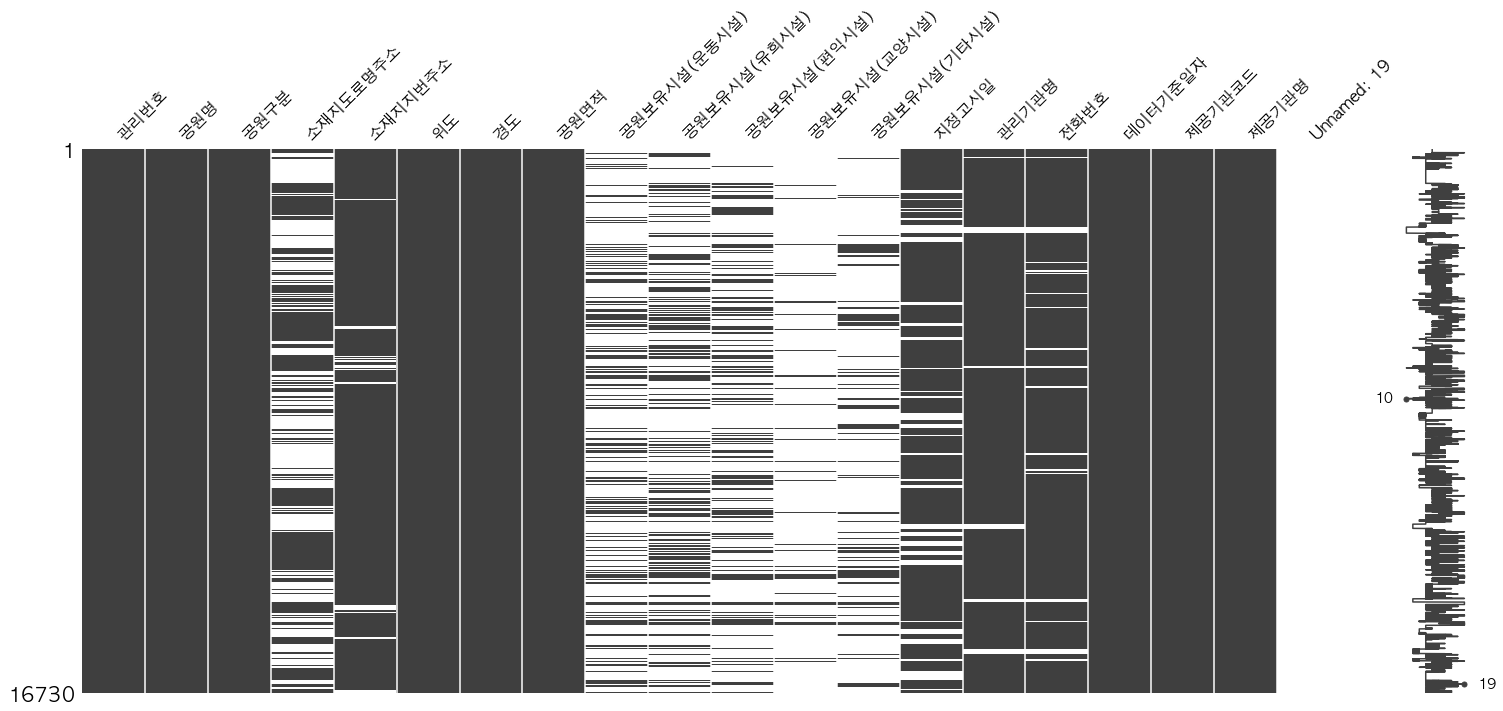

In [6]:
# Visualize null values in the dataset
import missingno as msno

msno.matrix(park)

#### 2-1-1. Drop the unable culumns

In [7]:
# Check column names in data

park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [8]:
# Remove unalbe columns

park.drop(columns=[  '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', 'Unnamed: 19'], inplace=True)

In [9]:
print(park.shape)
park.head()

(16730, 11)


관리번호       공원명  공원구분            소재지도로명주소              소재지지번주소  \
0  29170-00001    문화근린공원  근린공원     광주광역시 북구 대천로 86  광주광역시 북구 문흥동 1009-1   
1  29170-00002  두암제1근린공원  근린공원     광주광역시 북구 삼정로 36   광주광역시 북구 두암동 969-4   
2  29170-00003  첨단체육근린공원  근린공원  광주광역시 북구 임방울대로 877    광주광역시 북구 오룡동 1113   
3  29170-00004  일곡제1근린공원  근린공원     광주광역시 북구 일곡로 55   광주광역시 북구 일곡동 850-1   
4  29170-00005  일곡제2근린공원  근린공원    광주광역시 북구 설죽로 526   광주광역시 북구 일곡동 820-2   

          위도          경도      공원면적     데이터기준일자   제공기관코드     제공기관명  
0  35.184917  126.916686   87710.3  2018-04-17  3620000  광주광역시 북구  
1  35.165104  126.937650   13383.5  2018-04-17  3620000  광주광역시 북구  
2  35.220546  126.858765  170920.6  2018-04-17  3620000  광주광역시 북구  
3  35.207975  126.895445   34840.3  2018-04-17  3620000  광주광역시 북구  
4  35.206500  126.898395   10315.0  2018-04-17  3620000  광주광역시 북구

Finally, I have 16730 X 12 dataset.

#### 2-1-2. Partition Slicing

In [10]:
# Create '시도' column

park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]
park.head(2)

관리번호       공원명  공원구분         소재지도로명주소              소재지지번주소  \
0  29170-00001    문화근린공원  근린공원  광주광역시 북구 대천로 86  광주광역시 북구 문흥동 1009-1   
1  29170-00002  두암제1근린공원  근린공원  광주광역시 북구 삼정로 36   광주광역시 북구 두암동 969-4   

          위도          경도     공원면적     데이터기준일자   제공기관코드     제공기관명     시도  
0  35.184917  126.916686  87710.3  2018-04-17  3620000  광주광역시 북구  광주광역시  
1  35.165104  126.937650  13383.5  2018-04-17  3620000  광주광역시 북구  광주광역시

In [11]:
# Create '구군' column

park['구군'] = park['소재지도로명주소'].str.split(' ', expand=True)[1]
park.head(2)

관리번호       공원명  공원구분         소재지도로명주소              소재지지번주소  \
0  29170-00001    문화근린공원  근린공원  광주광역시 북구 대천로 86  광주광역시 북구 문흥동 1009-1   
1  29170-00002  두암제1근린공원  근린공원  광주광역시 북구 삼정로 36   광주광역시 북구 두암동 969-4   

          위도          경도     공원면적     데이터기준일자   제공기관코드     제공기관명     시도  구군  
0  35.184917  126.916686  87710.3  2018-04-17  3620000  광주광역시 북구  광주광역시  북구  
1  35.165104  126.937650  13383.5  2018-04-17  3620000  광주광역시 북구  광주광역시  북구

#### 2-1-3. Handling missing data

In [12]:
# null values in '소재지도로명주소' column

print('Sum of null value in 소재지도로명주소 column: ', park['소재지도로명주소'].isnull().sum()) 

Sum of null value in 소재지도로명주소 column:  8225


In [13]:
# null values in '소재지지번주소' column

print('Sum of null value in 소재지지번주소 column: ', park['소재지지번주소'].isnull().sum()) 

Sum of null value in 소재지지번주소 column:  854


In [14]:
# Copying values from other similar records

park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace=True)
park['소재지도로명주소'].isnull().sum()

0

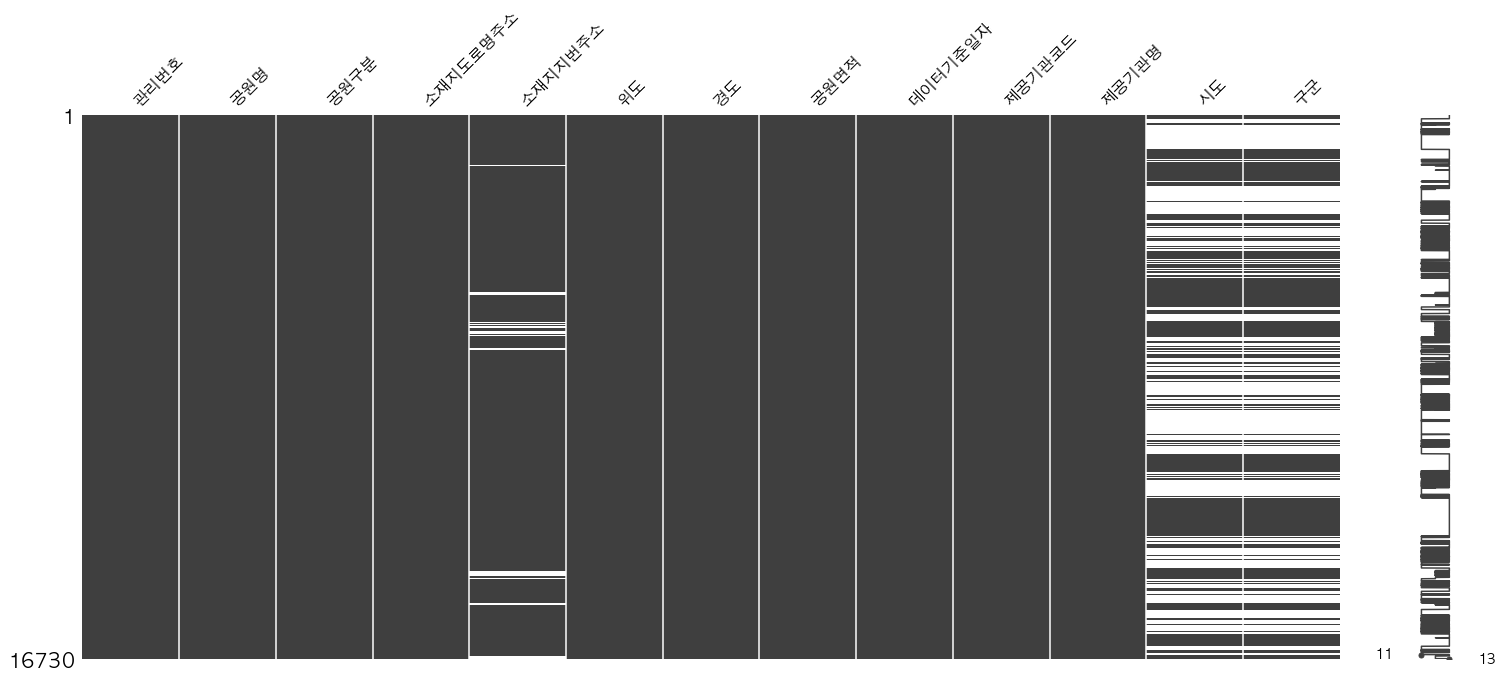

In [15]:
# Check out the missing data again

msno.matrix(park)

#### 2-1-4. Outlier Detection

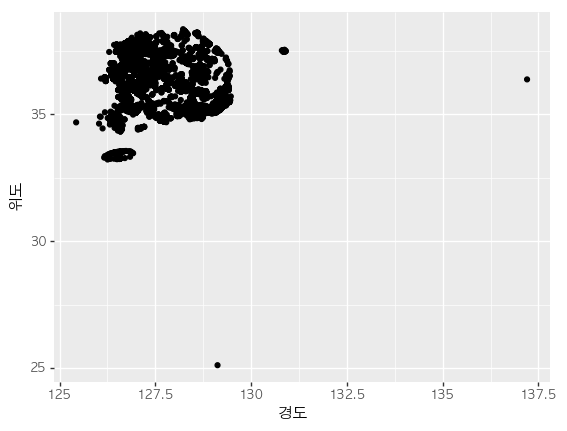

<ggplot: (304896902)>

In [16]:
# Plotting the park's location

plt.style.use('ggplot')

(ggplot(park)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='AppleGothic'))
)

In [17]:
# Summarizing the Latitude and longitude

park[['위도' , '경도']].describe()

위도            경도
count  16730.000000  16730.000000
mean      36.412486    127.584695
std        1.040769      0.900593
min       25.115601    125.432215
25%       35.492237    126.890311
50%       36.425708    127.143761
75%       37.445318    128.524963
max       38.350990    137.202661

In [18]:
# Sum of outliers

park_loc_notnull = park.loc[(park['위도'] > 32) & (park['경도'] < 132) & park['시도'].notnull()]
park_loc_notnull.shape

(8505, 13)

As you can see, there are some outliers in the map. The outlier is significantly different from all other observations.  Outliers are innocent until proven guilty they should not be removed unless there is a good reason for that.


However, In this dataset, There are 13ea outliers. These values are weird and suspicious from the Latitude and longitude in south of Korea. Some outliers are far away from origin location.  I think it is wrong locations obviously so I decide to remove it.


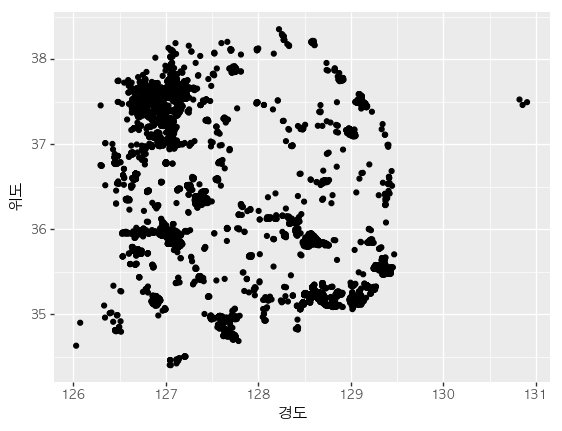

<ggplot: (304929940)>

In [19]:
# After removing ourliers

(ggplot(park_loc_notnull)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='AppleGothic'))
)

## 3. Visualizing Dataset

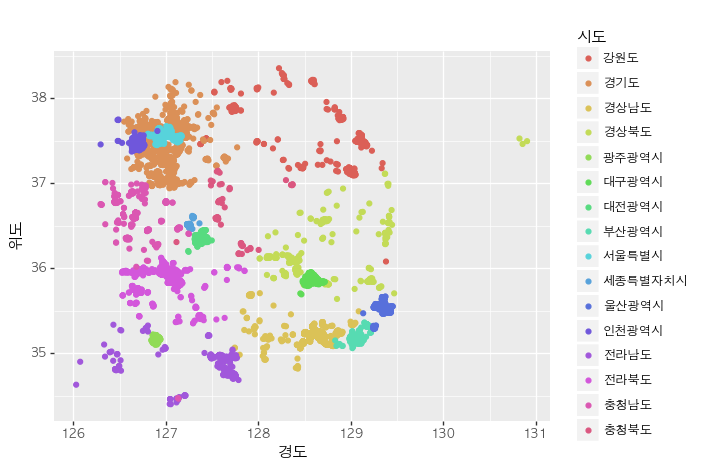

<ggplot: (-9223372036549878987)>

In [20]:
(ggplot(park_loc_notnull) 
 + aes( x ='경도' , y = '위도', color = '시도') 
 + geom_point()
 + theme(text=element_text(family='AppleGothic'))
)

In [21]:
# Check Parks Area

park['공원면적'].head()

0     87710.3
1     13383.5
2    170920.6
3     34840.3
4     10315.0
Name: 공원면적, dtype: float64

In [22]:
# Identify  percentage of Parks Area
# If the percentage is big then I draw it lager and the percentage is small then draw it smaller

park_loc_notnull['공원면적비율'] = park_loc_notnull['공원면적'].apply(lambda x : np.sqrt(x) * 0.01)
park_loc_notnull['공원면적비율'].head()

0    2.961592
1    1.156871
2    4.134254
3    1.866556
4    1.015628
Name: 공원면적비율, dtype: float64

### 3-1. Plotting Distribution of Parks

In [23]:
# Calculate the sum of parks and normalize it

park_do = pd.DataFrame(park['시도'].value_counts())
park_do_normalize = pd.DataFrame(park['시도'].value_counts(normalize = True) )

park_sido = park_do.merge(park_do_normalize, left_index = True, right_index = True).reset_index()
park_sido.head(3)

index  시도_x      시도_y
0   경기도  2207  0.259494
1  경상남도  1346  0.158260
2  전라북도   830  0.097590

In [24]:
# Rename column 

park_sido.columns=['시도', '합계', '비율']
park_sido.head()

시도    합계        비율
0    경기도  2207  0.259494
1   경상남도  1346  0.158260
2   전라북도   830  0.097590
3  울산광역시   662  0.077837
4  서울특별시   560  0.065844

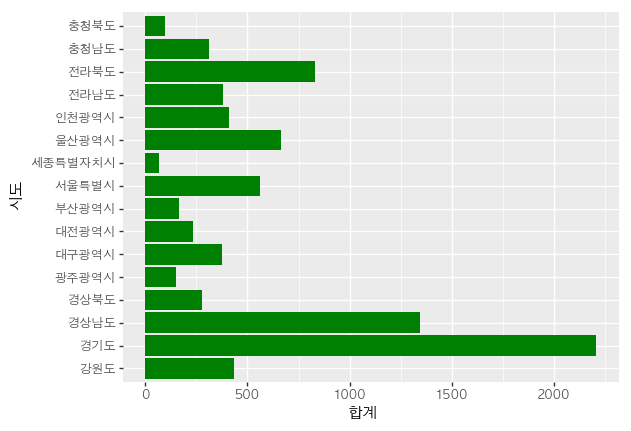

<ggplot: (304868528)>

In [25]:
# To chart plot

(ggplot(park_sido.sort_values(by=['합계'], ascending=False)) 
 + aes(x='시도', y='합계') 
 + geom_bar(stat='identity', position = 'dodge', fill = 'green') 
 + coord_flip()
 + theme(text=element_text(family='AppleGothic'))
)

### 3-2. Plotting Park's Distribution by types

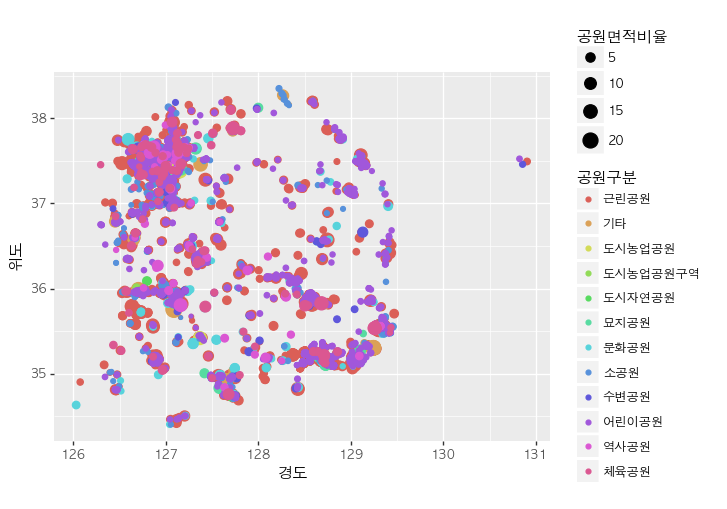

<ggplot: (309398813)>

In [31]:
(ggplot(park_loc_notnull) 
 + aes(x='경도', y='위도', color='공원구분', size = '공원면적비율')
 + geom_point()
 + theme(text=element_text(family='AppleGothic'))
)

In [32]:
park_type = park['공원구분'].value_counts().reset_index()
park_type.columns = ('공원구분', '합계')
park_type

공원구분    합계
0      어린이공원  9386
1       근린공원  3919
2        소공원  2281
3       문화공원   275
4       수변공원   253
5       체육공원   211
6         기타   200
7       역사공원   146
8       묘지공원    40
9     도시농업공원    12
10    도시자연공원     4
11  도시자연공원구역     2
12  도시농업공원구역     1

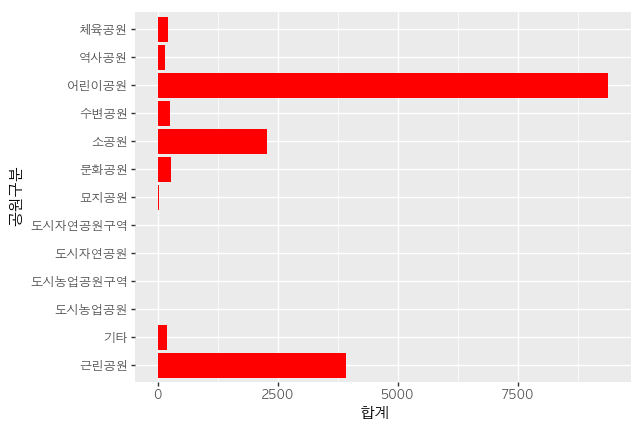

<ggplot: (-9223372036542959321)>

In [34]:
(ggplot(park_type) 
+ aes(x='공원구분' , y = '합계')
+ geom_bar(stat = 'identity', position = 'dodge', fill = 'red')
+ coord_flip()
+ theme(text=element_text(family='AppleGothic'))
)

### 3-3. Plotting park's Distribution in Gyeonggi-do 

In [35]:
gg = park.loc[park['시도'] == '경기도']
gg.shape

(2207, 13)

In [37]:
gg_park_type = gg['공원구분'].value_counts().reset_index()
gg_park_type.columns = ('공원구분' , '합계')

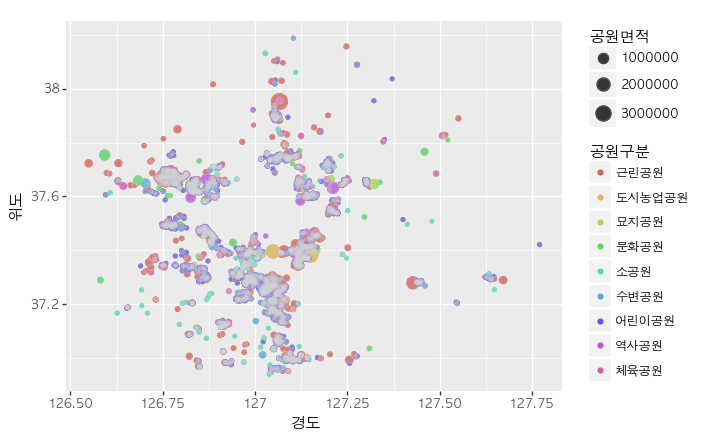

<ggplot: (-9223372036543428278)>

In [42]:
# Map of the kyungy-do

(ggplot(gg) 
+ aes(x='경도', y = '위도', color = '공원구분', size = '공원면적')
 + geom_point()
 + geom_jitter( color = 'lightgray' , alpha = 0.25)
  + theme(text=element_text(family='AppleGothic'))
)

#### Status of the Suwon city

In [43]:
gg_suwon = gg.loc[gg['구군'] == '수원시']

In [44]:
gg_suwon.shape

(261, 13)

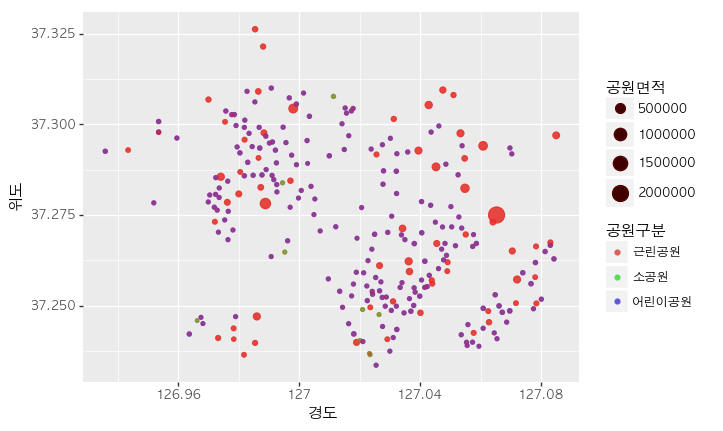

<ggplot: (311698843)>

In [46]:
(ggplot(gg_suwon) 
+ aes(x='경도', y = '위도', color= '공원구분', size = '공원면적')
 + geom_point()
 + geom_jitter( color='red' , alpha = 0.25)
  + theme(text=element_text(family='AppleGothic'))
)

### 3-4. Plotting park's Distribution in Seoul

In [71]:
# Extract seoul city column

seoul = park[park['시도'] == '서울특별시']
seoul.shape

(560, 13)

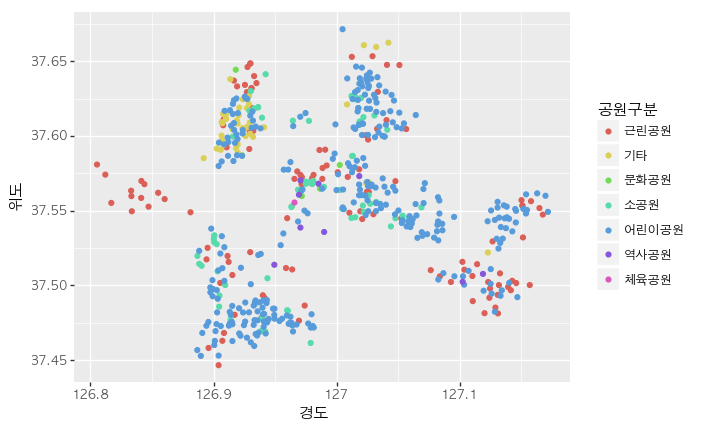

<ggplot: (310865949)>

In [72]:
# Map of the seoul

(ggplot(seoul) 
+ aes(x = '경도' , y = '위도', color = '공원구분')
+ geom_point()
+ theme(text=element_text(family='AppleGothic'))
)

In [73]:
# Detection outlier
#park_loc_notnull = park.loc[(park['위도'] > 32) & (park['경도'] < 132) & park['시도'].notnull()]

long_outlier =  seoul[seoul['경도'] > 127.4]

In [74]:
lat_outlier = seoul[seoul['위도'] < 37.4]

In [86]:
# There are 13ea outliers in seoul data

lat_outlier.shape

(0, 13)

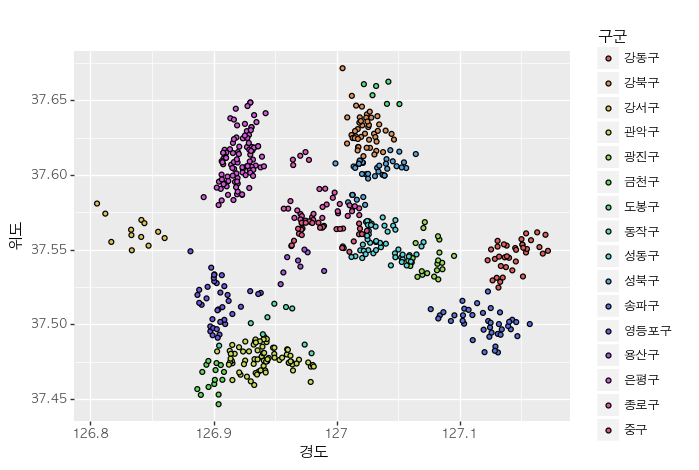

<ggplot: (306315696)>

In [87]:
(ggplot(seoul)
 + aes(x='경도', y='위도', fill='구군')
 + geom_point()
 + theme(text=element_text(family='AppleGothic'))
)

#### * 각 구별 공원 분표 확인

In [79]:
gu = '강남구 강동구 강북구 강서구 관악구 광진구 구로구 금천구 노원구 도봉구 동대문구 동작구 마포구 서대문구 서초구 성동구 성북구 송파구 양천구 영등포구 용산구 은평구 종로구 중구 중랑구'
gu = gu.split(' ')
print('There are  {}ea parks in seoul.'.format(len(gu)))

There are  25ea parks in seoul.


In [80]:
# Display numbers of parks in seoul

seoul_gu = seoul['구군'].value_counts().reset_index()
seoul_gu.columns = ('구군' , '공원수')

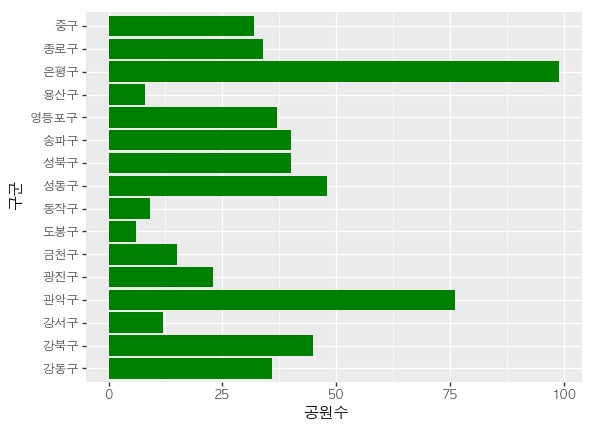

<ggplot: (306305740)>

In [81]:
(ggplot(seoul_gu.sort_values(by = ['공원수'], ascending = False))
+ aes( x = '구군', y = '공원수')
 + geom_bar(stat = 'identity', position = 'dodge', fill = 'green')
 + coord_flip()
  + theme(text=element_text(family='AppleGothic'))
)